In [84]:
import pandas as pd
base = pd.read_csv('house_prices.csv')

In [85]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
base.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [87]:
base.shape

(21613, 21)

In [88]:
house_sizes = base.iloc[:, 5].values
house_sizes = house_sizes.reshape(-1, 1)

In [89]:
house_sizes

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [90]:
prices = base.iloc[:, 2:3].values
prices.shape

(21613, 1)

In [91]:
from sklearn.preprocessing import StandardScaler
scaler_house_sizes = StandardScaler()
house_sizes_transformed = scaler_house_sizes.fit_transform(house_sizes)

scaler_prices = StandardScaler()
prices_transformed = scaler_house_sizes.fit_transform(prices)

In [92]:
house_sizes_transformed

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [93]:
prices_transformed

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

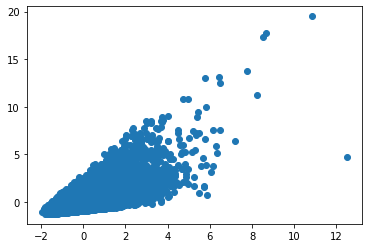

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(house_sizes_transformed, prices_transformed)

# Fórmula da regressão linear simples

`y = b0 + b1 * x`

In [95]:
import numpy as np
np.random.seed(1)
initial_values = np.random.rand(2)

In [96]:
import tensorflow as tf

In [97]:
b0 = tf.Variable(initial_values[0])
b1 = tf.Variable(initial_values[1])

In [98]:
def linear_regression(x):
    return b0 + b1 * x

In [99]:
optimizer = tf.optimizers.SGD(learning_rate = 0.001)
batch_size = 32

In [115]:
for i in range(1000):
    indexes = np.random.randint(len(house_sizes_transformed), size = batch_size)
    with tf.GradientTape() as gradient_tape:
        prediction = linear_regression(house_sizes_transformed[indexes])
        loss = tf.losses.mean_squared_error(prices_transformed[indexes], prediction)
    gradients = gradient_tape.gradient(loss, [b1, b0])
    optimizer.apply_gradients(zip(gradients, [b1, b0]))

results = linear_regression(house_sizes_transformed).numpy()

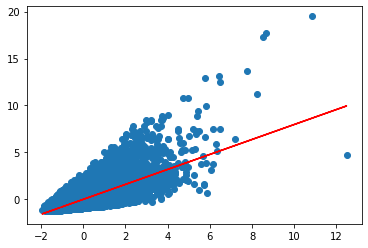

In [116]:
plt.plot(house_sizes_transformed, prices_transformed, 'o')
plt.plot(house_sizes_transformed, results, color = 'red')

In [117]:
prices_result = scaler_house_sizes.inverse_transform(results)

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(prices, prices_result)
mse = mean_squared_error(prices, prices_result)
print(mae)
print(mse)

181360.52850843495
69572438634.50555
